<a href="https://colab.research.google.com/github/asjadnazir/machine_learning/blob/main/seeds_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
clms = ['area','perimeter','compactness','length','width','asymmetry','groove','class']
df = pd.read_csv("seeds_dataset.txt",names=clms,sep='\s+')

In [6]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
for i in range(len(clms)-1):
  for j in range(i+1, len(clms)-1):
    x_label = clms[i]
    y_label = clms[j]
    sns.scatterplot(x=x_label,y=y_label,data=df, hue='class')
    # plt.show()

Clustering

In [10]:
from sklearn.cluster import KMeans

In [14]:
x = 'perimeter'
y = 'asymmetry'
X = df[[x,y]].values

In [15]:
kmeans = KMeans(n_clusters=3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
clusters = kmeans.labels_

In [19]:
cluster_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))),columns=[x,y,"class"])

[]

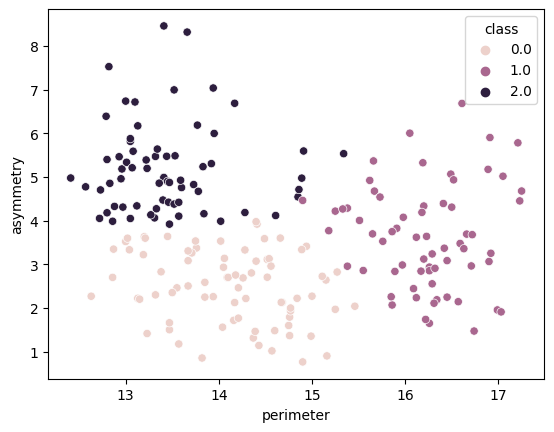

In [20]:
# K means cluster
sns.scatterplot(x=x,y=y,hue='class',data=cluster_df)
plt.plot()

[]

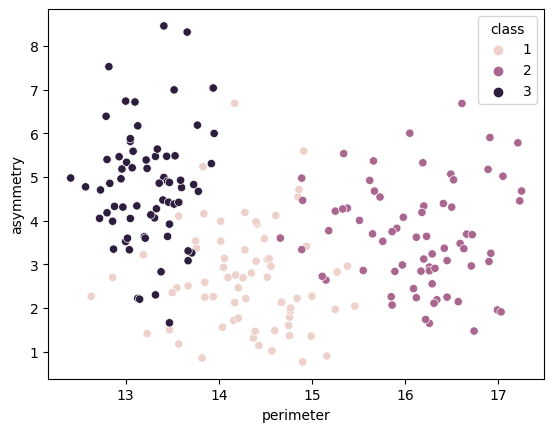

In [21]:
# Original cluster
sns.scatterplot(x=x,y=y,hue='class',data=df)
plt.plot()

Higher Dimenstions

In [22]:
X = df[clms[:-1]].values

In [25]:
hmeans = KMeans(n_clusters = 3).fit(X)
clusters = kmeans.labels_
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))),columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

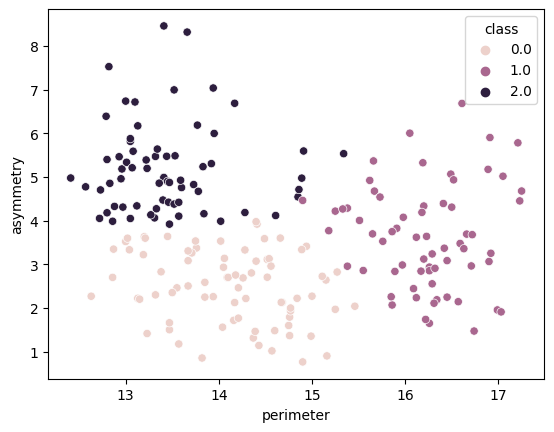

In [26]:
# K means cluster
sns.scatterplot(x=x,y=y,hue='class',data=cluster_df)
plt.plot()

[]

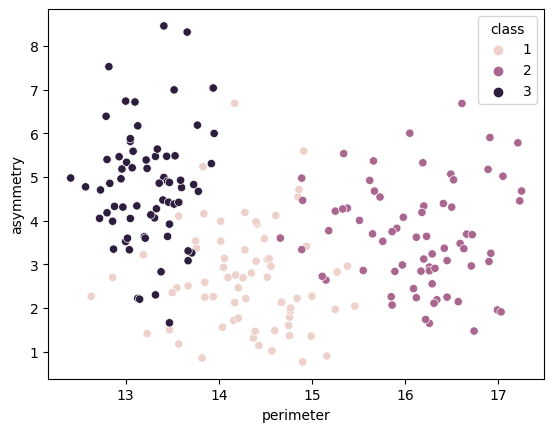

In [27]:
# Original cluster
sns.scatterplot(x=x,y=y,hue='class',data=df)
plt.plot()

PCA

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [31]:
X.shape

(210, 7)

In [32]:
transformed_x.shape

(210, 2)

In [33]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

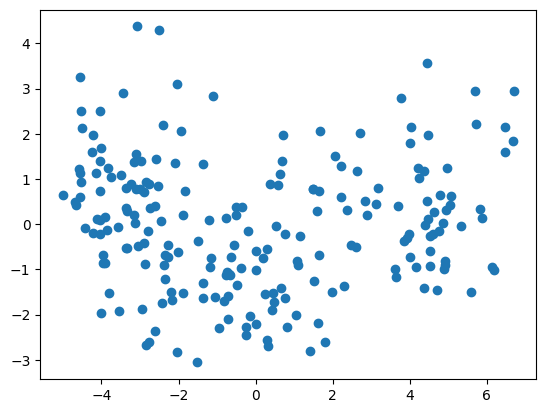

In [36]:
plt.scatter(transformed_x[:,0],transformed_x[:,1])
plt.show()

In [39]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x,kmeans.labels_.reshape(-1,1))),columns=["pca1","pca2","class"])

In [43]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x,df['class'].values.reshape(-1,1))),columns=["pca1","pca2","class"])

[]

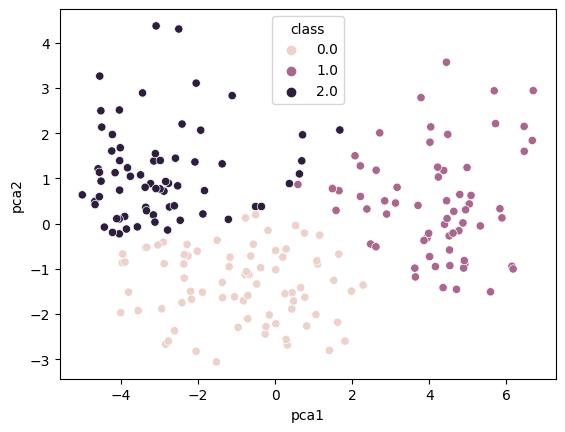

In [41]:
# K means cluster
sns.scatterplot(x='pca1',y='pca2',hue='class',data=kmeans_pca_df)
plt.plot()

[]

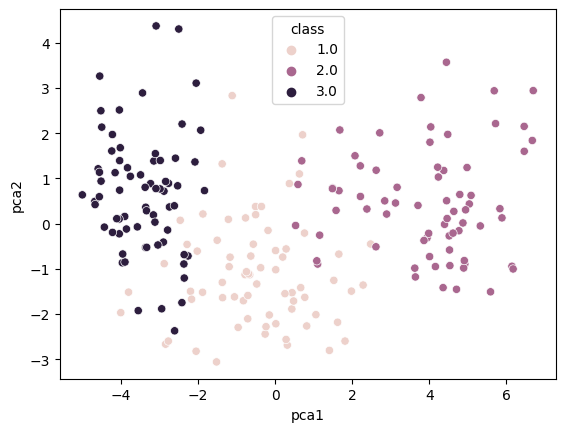

In [44]:
# Truth cluster
sns.scatterplot(x='pca1',y='pca2',hue='class',data=truth_pca_df)
plt.plot()